In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [68]:
df= pd.read_csv("cubic_zirconia-1.csv",index_col=0)
df.head()


,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


# 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [69]:
df.shape

(26967, 10)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [71]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [72]:
df.duplicated().sum()

34

In [14]:
df.describe()


,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


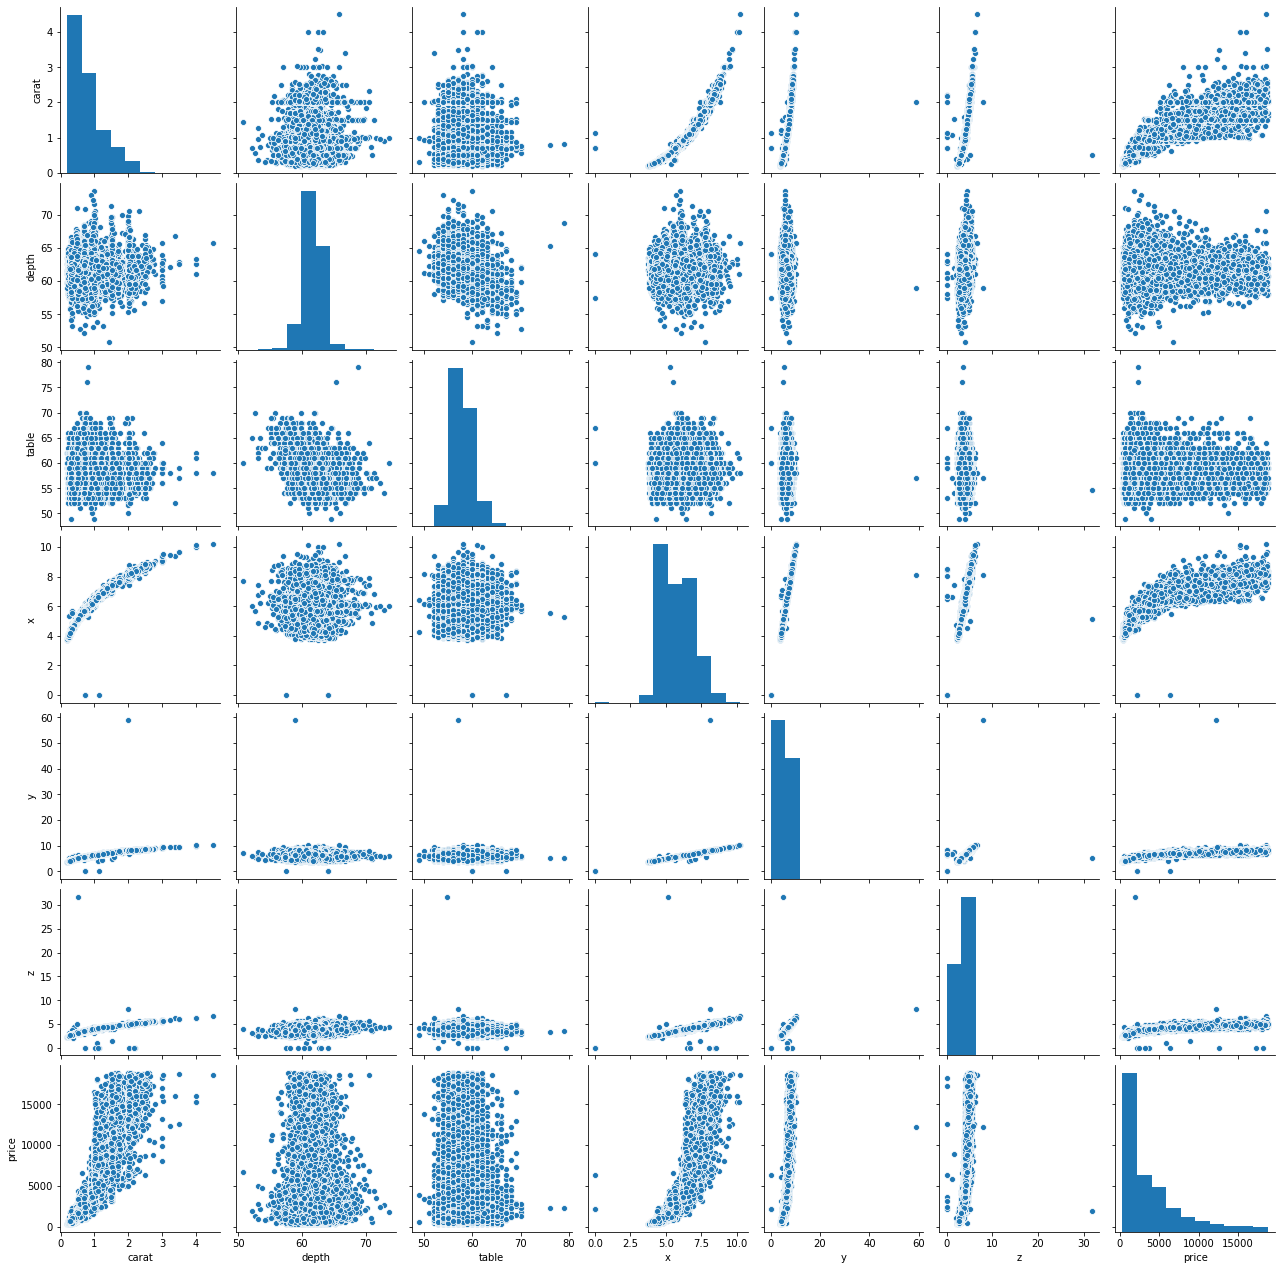

In [17]:
sns.pairplot(df)

In [18]:
c= df.corr()
c

,carat,depth,table,x,y,z,price
carat,1.000000,0.035364,0.181685,0.976368,0.941071,0.940640,0.922416
depth,0.035364,1.000000,-0.298011,-0.018715,-0.024735,0.101624,-0.002569
table,0.181685,-0.298011,1.000000,0.196206,0.182346,0.148944,0.126942
x,0.976368,-0.018715,0.196206,1.000000,0.962715,0.956606,0.886247
y,0.941071,-0.024735,0.182346,0.962715,1.000000,0.928923,0.856243
z,0.940640,0.101624,0.148944,0.956606,0.928923,1.000000,0.850536
price,0.922416,-0.002569,0.126942,0.886247,0.856243,0.850536,1.000000


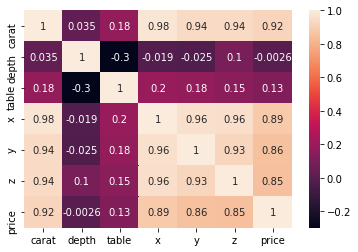

In [20]:
sns.heatmap(c,annot=True)

In [73]:
df.drop_duplicates(inplace=True)

# 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [74]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()        

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [42]:
df.loc[df['carat']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [43]:
df.loc[df['cut']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [44]:
df.loc[df['clarity']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [45]:
df.loc[df['depth']==0]


,carat,cut,color,clarity,depth,table,x,y,z,price


In [46]:
df.loc[df['table']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [47]:
df.loc[df['x']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5822,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17507,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [49]:
df.loc[df['y']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5822,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17507,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [50]:
df.loc[df['z']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5822,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6035,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10828,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12499,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12690,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17507,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18195,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23759,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [51]:
df.loc[df['price']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [75]:
df.replace(0,df[column].mean(),inplace=True)

# 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

In [63]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           780
Good          2435
Very Good     6027
Premium       6886
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4095
F    4723
E    4916
G    5653
Name: color, dtype: int64


CLARITY :  8
I1       364
IF       891
VVS1    1839
VVS2    2530
VS1     4087
SI2     4564
VS2     6093
SI1     6565
Name: clarity, dtype: int64




In [79]:
df = pd.get_dummies(df, columns=['cut','color','clarity'],drop_first=True)

In [90]:
X = df.drop('price', axis=1)
y = df[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [99]:
ss=StandardScaler() 
df_scaled= ss.fit_transform(df)

In [101]:
from scipy.stats import zscore
X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [102]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [103]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.0573951692229402
The coefficient for depth is -0.006334609800954454
The coefficient for table is -0.013390821776727615
The coefficient for x is -0.10288987475330029
The coefficient for y is 0.100533604454233
The coefficient for z is 0.0025181728042565285
The coefficient for cut_Good is 0.04105943927316966
The coefficient for cut_Ideal is 0.10296654068257544
The coefficient for cut_Premium is 0.0814260583734314
The coefficient for cut_Very Good is 0.07751557716963065
The coefficient for color_E is -0.018631031957032293
The coefficient for color_F is -0.029848672433674395
The coefficient for color_G is -0.053196309369932214
The coefficient for color_H is -0.09017286913325237
The coefficient for color_I is -0.1134041268956382
The coefficient for color_J is -0.1313232948442546
The coefficient for clarity_IF is 0.23353241801307367
The coefficient for clarity_SI1 is 0.3668802067274131
The coefficient for clarity_SI2 is 0.2300234296852769
The coefficient for cla

In [104]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.3779465330684858e-16


In [105]:
regression_model.score(X_train_scaled, y_train_scaled)

0.916337365576111

In [107]:

mse = np.mean((regression_model.predict(X_train_scaled)-y_train_scaled)**2)

In [109]:
import math

math.sqrt(mse)

0.2845728707175205

In [110]:
y_pred = regression_model.predict(X_train_scaled)

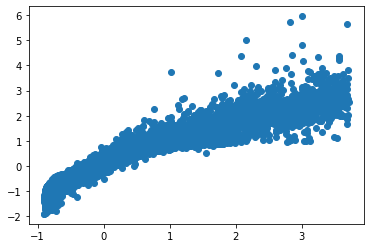

In [112]:
plt.scatter(y_train_scaled['price'], y_pred)

In [113]:
regression_model.score(X_test_scaled, y_test_scaled)

0.9190182812515895

In [115]:
mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [116]:
math.sqrt(mse)

0.2845728707175205

In [118]:
ytest_pred = regression_model.predict(X_test_scaled)

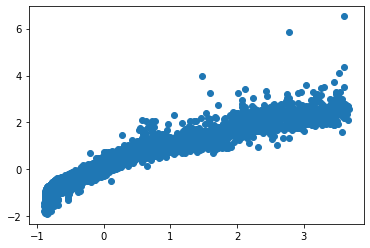

In [119]:
plt.scatter(y_test_scaled['price'], ytest_pred)

In [123]:
df_scaled.shape

(26933, 24)

In [3]:
df2= pd.read_csv("Holiday_Package-1.csv",index_col=0)
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
1,no,48412,30,8,1,1,no
2,yes,37207,45,8,0,1,no
3,no,58022,46,9,0,0,no
4,no,66503,31,11,2,0,no
5,no,66734,44,12,0,2,no


# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [4]:
df2.shape

(872, 7)

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1 to 872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 54.5+ KB


In [6]:
df2.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


In [7]:
df2.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [8]:
df2.duplicated().sum()

0

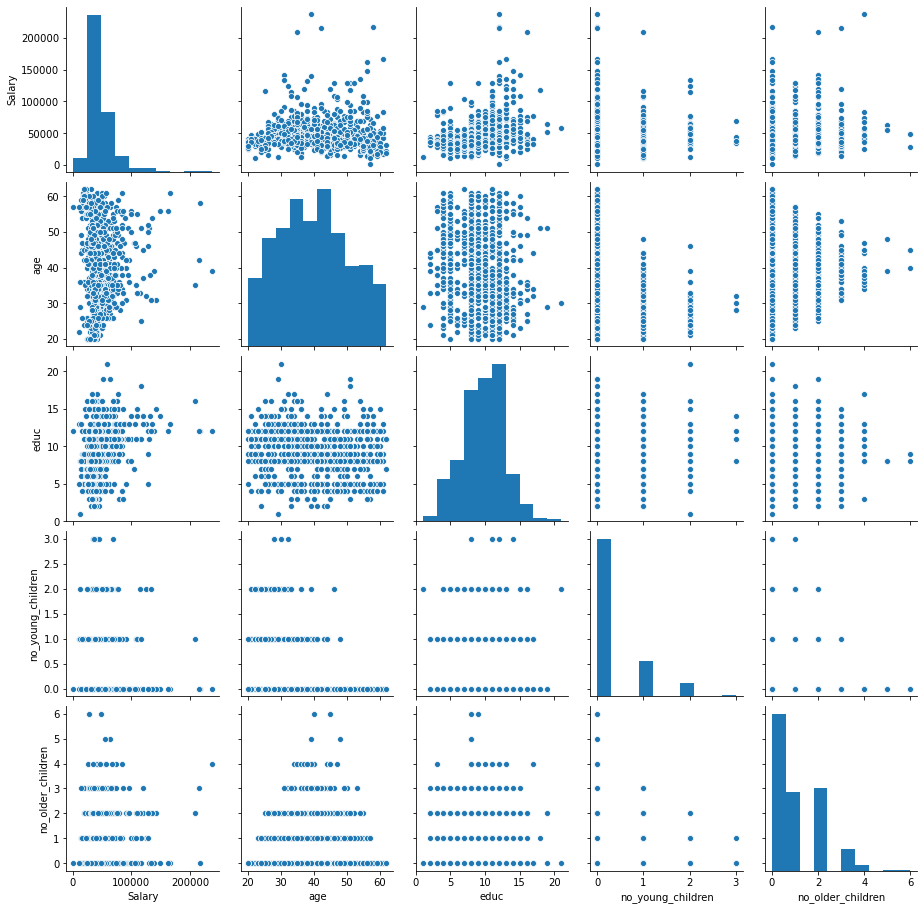

In [9]:
sns.pairplot(df2)

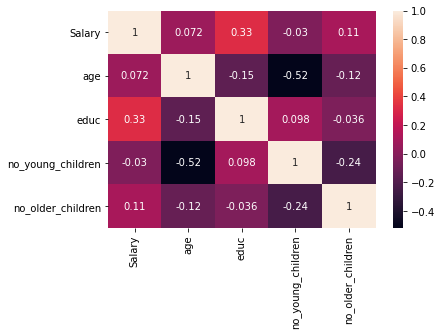

In [10]:
a= df2.corr()
sns.heatmap(a,annot=True);

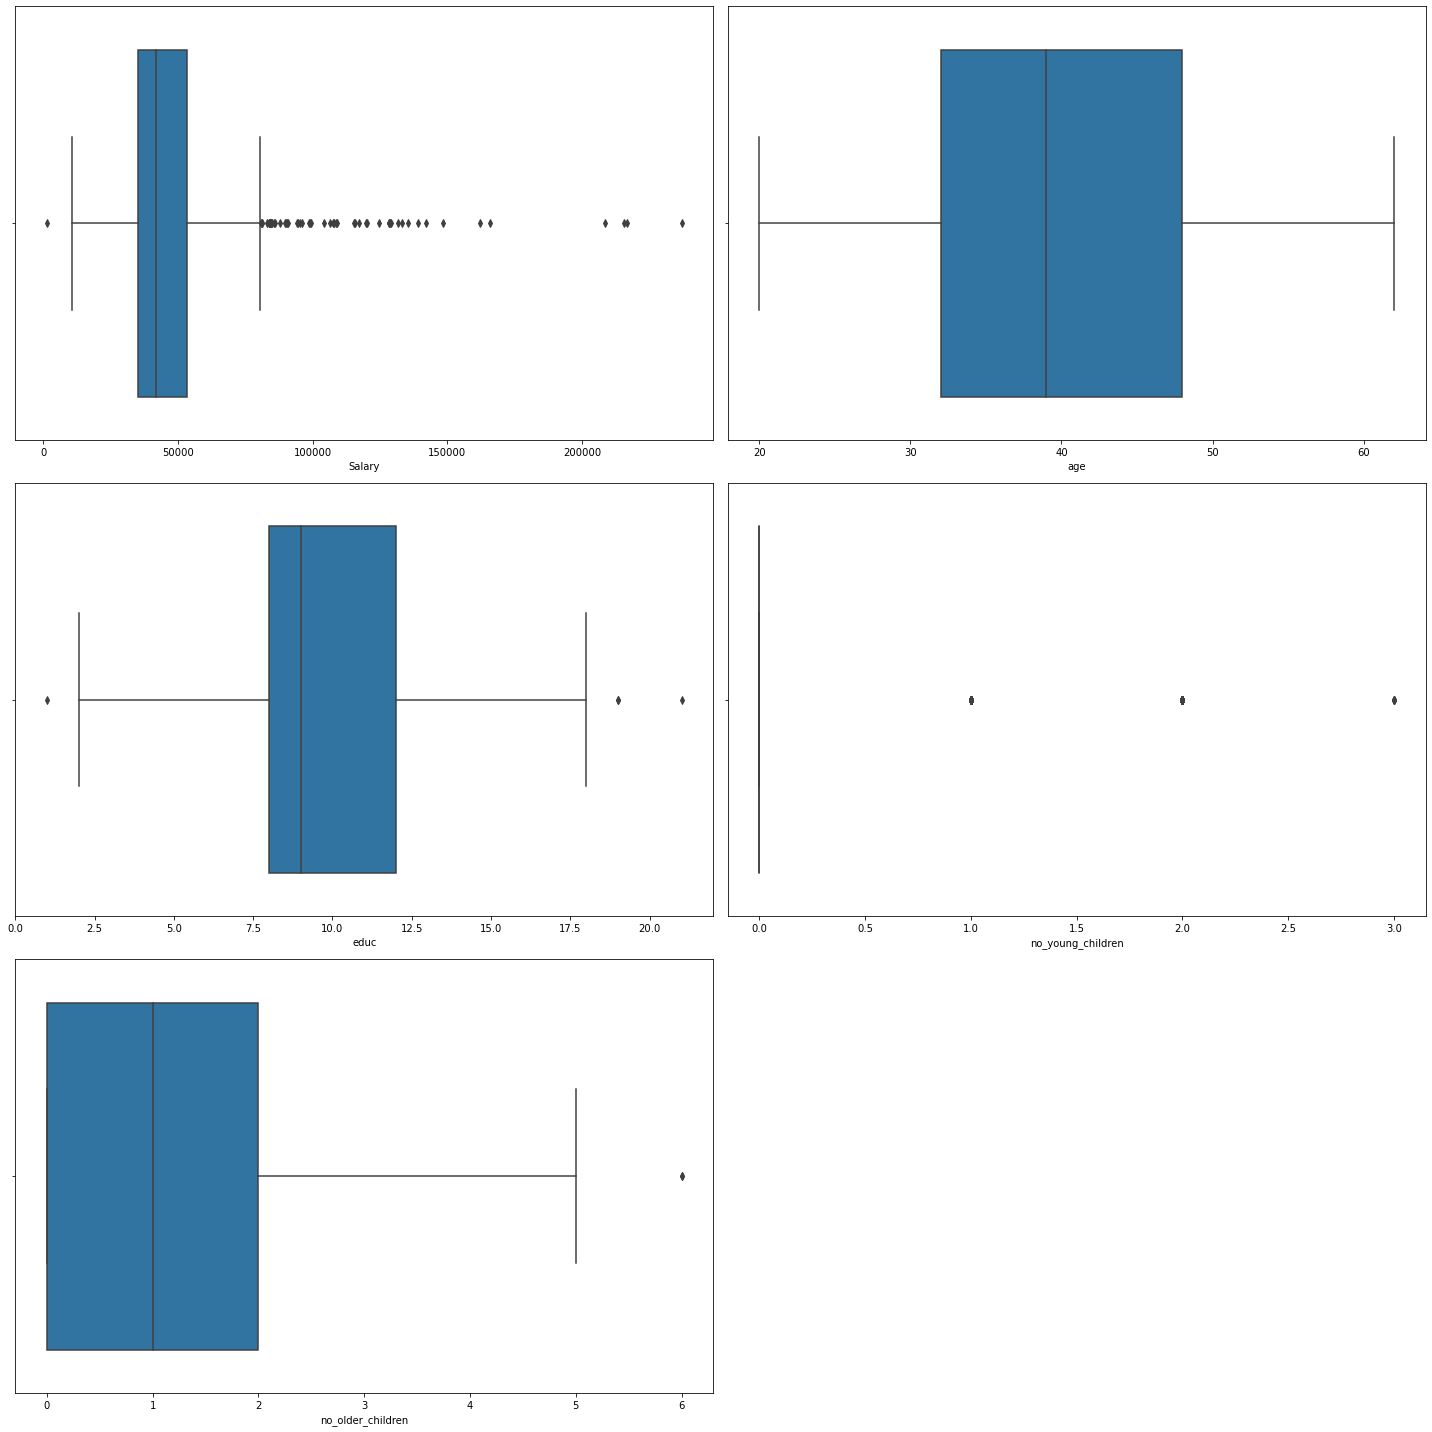

In [16]:
data= df2[["Salary","age","educ","no_young_children","no_older_children"]]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data[data.columns[i]])
    plt.tight_layout()


In [17]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [19]:
lr,ur=remove_outlier(df2["Salary"])
print('Lower Range :',lr,'\nUpper Range :',ur)
df2['Salary']=np.where(df2['Salary']>ur,ur,df2['Salary'])
df2['Salary']=np.where(df2['Salary']<lr,lr,df2['Salary'])

Lower Range : 8105.75 
Upper Range : 80687.75


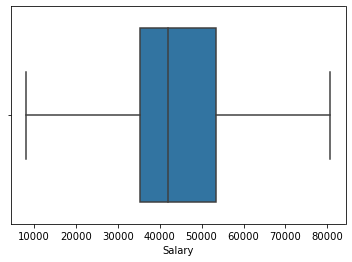

In [20]:
sns.boxplot(df2["Salary"])

## 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).



In [21]:
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        print()
        print('feature:',feature)
        print(pd.Categorical(df2[feature].unique()))
        print(pd.Categorical(df2[feature].unique()).codes)
        df2[feature] = pd.Categorical(df2[feature]).codes


feature: Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]

feature: foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


In [22]:
df2.head(5)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
1,0,48412.0,30,8,1,1,0
2,1,37207.0,45,8,0,1,0
3,0,58022.0,46,9,0,0,0
4,0,66503.0,31,11,2,0,0
5,0,66734.0,44,12,0,2,0


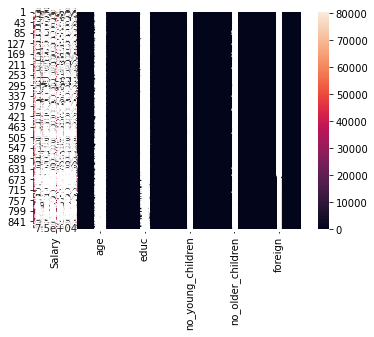

In [26]:
X=df2.drop("Holliday_Package",axis=1)
y=df2.pop("Holliday_Package")

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [62]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=-1)
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished


LogisticRegression(max_iter=10000, n_jobs=-1, penalty='none',
                   solver='newton-cg', verbose=True)

In [64]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [65]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.773610,0.226390
1,0.272671,0.727329
2,0.902697,0.097303
3,0.958479,0.041521
4,0.512982,0.487018


In [66]:
model.score(X_train, y_train)

0.6754098360655738

AUC: 0.742


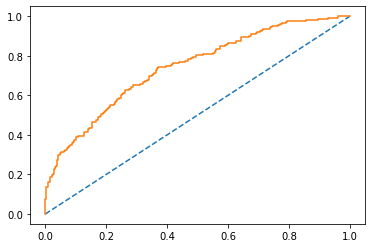

In [67]:
probs = model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [37]:
confusion_matrix(y_train, ytrain_predict)

array([[252,  74],
       [124, 160]])

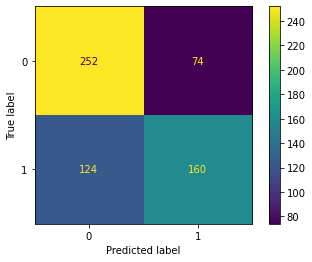

In [38]:
plot_confusion_matrix(model,X_train,y_train);

In [39]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.62       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610



In [36]:
model.score(X_test, y_test)

0.6374045801526718

AUC: 0.705


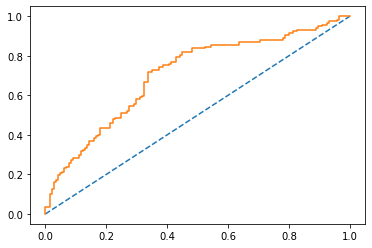

In [68]:
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [41]:
confusion_matrix(y_test, ytest_predict)

array([[102,  43],
       [ 52,  65]])

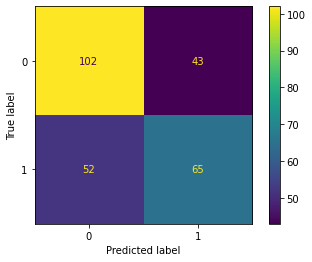

In [42]:
plot_confusion_matrix(model,X_test,y_test);

In [43]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       145
           1       0.60      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [72]:
clf = LinearDiscriminantAnalysis()
model2=clf.fit(X_train,y_train)



In [77]:
model2.score(X_train,y_train)

0.6754098360655738

In [78]:
model2.score(X_test,y_test)

0.6412213740458015

In [79]:
pred_class_train = model2.predict(X_train)
pred_class_test = model2.predict(X_test)

In [80]:
metrics.confusion_matrix(y_train,pred_class_train)

array([[254,  72],
       [126, 158]])

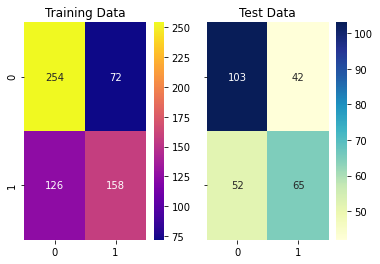

In [81]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='plasma',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [82]:
tn,fp,fn,tp=metrics.confusion_matrix(y_train,pred_class_train).ravel()
print('True Negative:',tn,'\n''False Positive:',fp,'\n''False Negative:',fn,'\n','True Positive:',tp)


True Negative: 254 
False Positive: 72 
False Negative: 126 
 True Positive: 158


In [83]:
tn,fp,fn,tp=metrics.confusion_matrix(y_test,pred_class_test).ravel()
print('True Negative:',tn,'\n''False Positive:',fp,'\n''False Negative:',fn,'\n','True Positive:',tp)


True Negative: 103 
False Positive: 42 
False Negative: 52 
 True Positive: 65


In [84]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.78      0.72       326
           1       0.69      0.56      0.61       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262
 



In [86]:
pred_prob_train = model2.predict_proba(X_train)
pred_prob_test = model2.predict_proba(X_test)

AUC for the Training Data: 0.739


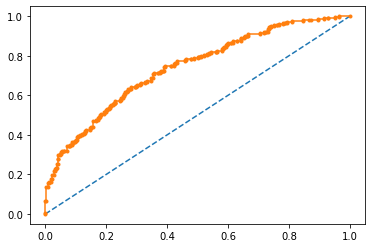

In [87]:
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

AUC for the Test Data: 0.703


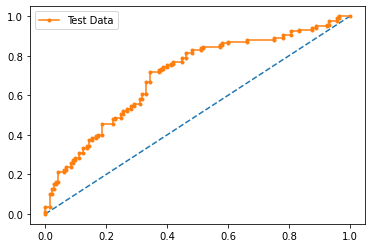

In [88]:
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Test Data')

plt.legend(loc='best')
plt.show()

In [97]:
df2["Holiday_Packages"]=y
df2.head()

,Salary,age,educ,no_young_children,no_older_children,foreign,Holiday_Packages
1,48412.0,30,8,1,1,0,0
2,37207.0,45,8,0,1,0,1
3,58022.0,46,9,0,0,0,0
4,66503.0,31,11,2,0,0,0
5,66734.0,44,12,0,2,0,0


In [98]:
df2.corr()


,Salary,age,educ,no_young_children,no_older_children,foreign,Holiday_Packages
Salary,1.000000,0.047029,0.352726,-0.034360,0.121993,-0.239387,-0.180214
age,0.047029,1.000000,-0.149294,-0.519093,-0.116205,-0.107148,-0.092311
educ,0.352726,-0.149294,1.000000,0.098350,-0.036321,-0.419678,-0.102552
no_young_children,-0.034360,-0.519093,0.098350,1.000000,-0.238428,0.085111,-0.173115
no_older_children,0.121993,-0.116205,-0.036321,-0.238428,1.000000,0.021317,0.080286
foreign,-0.239387,-0.107148,-0.419678,0.085111,0.021317,1.000000,0.254096
Holiday_Packages,-0.180214,-0.092311,-0.102552,-0.173115,0.080286,0.254096,1.000000


0.6374045801526718